# Handling Data over time

There's a widespread trend in solar physics at the moment for correlation over actual science, so being able to handle data over time spans is a skill we all need to have. Python has ample support for this so lets have a look at what we can use.

<section class="objectives panel panel-warning">
<div class="panel-heading">
<h2><span class="fa fa-certificate"></span> Learning Objectives </h2>
</div>
<br/>
<ul>
<li> Understand and use SunPy lightcurve. </li>
<li> Create a pandas dataframe. </li>
<li> Utilise the datetime package </li>
<li> Use the pandas dataframe to plot the data within it. </li>
</ul>
<br/>
</section>



## SunPy Lightcurve

SunPy provides a lightcurve object to handle this type of time series data. The module has a number of instruments associated with it, including:

* GOES XRS LightCurve
* SDO EVE LightCurve for level 0CS data
* Proba-2 LYRA LightCurve
* NOAA Solar Cycle monthly indices.
* Nobeyama Radioheliograph Correlation LightCurve.
* RHESSI X-ray Summary LightCurve.

We're going to examine the lightcurves created by a solar flare on June 7th 2011.

Lets begin with the import statements:

In [ ]:
from __future__ import print_function, division
import numpy as np
import sunpy
from sunpy import lightcurve as lc
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Now lets create some lightcurves

In [ ]:
goes_lightcurve = lc.GOESLightCurve.create('2011-06-07 06:00', '2011-06-07 08:00')
hsi_lightcurve = lc.RHESSISummaryLightCurve.create('2011-06-07 06:00', '2011-06-07 08:00')

In terms of LYRA, the server only allows you to download an entire day of data at a time. We can match this to the rest of the data by using the truncate function.

In [ ]:
lyra_lightcurve_fullday = lc.LYRALightCurve.create('2011-06-07')
lyra_lightcurve = lyra_lightcurve_fullday.truncate('2011-06-07 06:00', '2011-06-07 08:00')

Part of the advantage of using these inbuilt functions we can get a quicklook at our data using short commands:

In [ ]:
fig = goes_lightcurve.peek()
fig = lyra_lightcurve.peek()

### Accessing and using the data

More custom plots can be made easily by accessing the data in the lightcurve functionality. Both the time information and the data are contained within the lightcurve.data code, which is a pandas dataframe. We can see what data is contained in the dataframe by finding which keys it contains and also asking what's in the meta data: 

In [ ]:
print(lyra_lightcurve.data.keys())

In [ ]:
print(lyra_lightcurve.meta)

Notice that the meta data information is stored in something called `OrderedDict`

<section class="objectives panel panel-info">
<div class="panel-heading">
<h2><span class="fa fa-thumb-tack"></span> On Dictionaries </h2>
</div>
<br/>
We can create keyword-data pairs to form a dictionary (shock horror) of values. In this case we have defined some strings and number to represent temperatures across europe

<pre>
temps = {'Brussles': 9, 'London': 3, 'Barcelona': 13, 'Rome': 16}
temps['Rome']
16
</pre>

We can also find out what keywords are associated with a given dictionary, In this case:

<pre>
temps.keys()
dict_keys(['London', 'Barcelona', 'Rome', 'Brussles'])
</pre>

</code>
<br/>
</section>

We can use these keys to plot specific parameters from the lightcurve, Aluminium is 'CHANNEL3' and Zirconium is 'CHANNEL4. These measurements are taken on a instuments which detect events at different energy levels.

In [ ]:
plt.figure(1, figsize = (10,5))
plt.plot(lyra_lightcurve.data.index, lyra_lightcurve.data['CHANNEL3'], color='b')
plt.plot(lyra_lightcurve.data.index, lyra_lightcurve.data['CHANNEL4'], color='r')
plt.ylabel('Flux (WM^2)')
plt.show()

### Analysing Lightcurve data

We can asses the degree to which the lyra curves correlate with each other:

In [ ]:
cross_correlation = np.correlate(lyra_lightcurve.data['CHANNEL3'],
                                lyra_lightcurve.data['CHANNEL4'])
print(cross_correlation)

## Pandas

In its own words Pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. Pandas has two forms of structures, 1D series and 2D dataframe. It also has its own functions associated with it.

It is also amazing.

Lightcurve uses these in built Pandas functions, so we can find out things like the maximum of curves:


In [ ]:
# max time argument taken from long and short GOES channels
# max_time argument taken from channel 3 & 4 LYRA channels

max_t_goes_long = goes_lightcurve.data['xrsb'].idxmax()
max_t_goes_short = goes_lightcurve.data['xrsa'].idxmax()

max_t_lyra_al = lyra_lightcurve.data['CHANNEL3'].idxmax()
max_t_lyra_zr = lyra_lightcurve.data['CHANNEL4'].idxmax()

print('GOES max values', max_t_goes_long, max_t_goes_short)
print('LYRA max values', max_t_lyra_al, max_t_lyra_zr)

So lets plot them on the graph

In [ ]:
# create figure with raw curves

plt.figure(1, figsize=(10,5))
plt.plot(lyra_lightcurve.data.index, lyra_lightcurve.data['CHANNEL3'], color='b', linestyle='--')
plt.plot(lyra_lightcurve.data.index, lyra_lightcurve.data['CHANNEL4'], color='r', linestyle=':')
plt.ylabel('Flux (Wm^2)')

# max vertical lines

plt.axvline(max_t_lyra_al, color='b', linestyle='--', linewidth=2)
plt.axvline(max_t_lyra_zr, color='r', linestyle=':', linewidth=2)
plt.axvline(max_t_goes_long, color='g', linestyle='--')

plt.show()

## Reading in Tablulated data

Now we have seen a little of what Pandas can do, lets read in some of our own data. In this case we are going to use data from Bennett et al. 2015, ApJ, a truly ground breaking work. Now the data we are reading in here is a structured Array.


In [ ]:
data_ms = np.genfromtxt('data/macrospicules.csv', skip_header=1, dtype=None, delimiter=',')

Now, the above line imports information on some solar features over a sample time period. Specifically we have, maximum length, lifetime and time at which they occured. Now if we type `data[0]` what will happen?

In [ ]:
data_ms[0]

This is the first row of the array, containing the first element of our three properties. This particular example is a stuctured array, so the columns and rows can have properties and assign properties to the header. We can ask what the title of these columns is by using a `dtype` command:

In [ ]:
data_ms.dtype.names

Unhelpful, so lets give them something more recognisable. We can use the docs to look up syntax and change the names of the column lables.
<br/>
<section class="objectives panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Google your troubles away </h2>
</div>
<br/>
So the docs are [here](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.genfromtxt.html). Find the syntax to change to names to better to represent maximum length, lifetime and point in time which they occured.
<br/>
</section>

In [ ]:
data_ms.dtype.names = ['max_len', 'ltime', 'sample_time']

data_ms.dtype.names


### DataFrame

Now a pandas DataFrame takes two arguments as a minimum, index and data. In this case the index will be our time within the sample and the maximum length and lifetime will be our data. So lets import pandas and use the dataframe:

Pandas reads a dictionary when we want to input multiple data columns. Therefore we need to make a dictionary of our data and read that into a pandas data frame. First we need to import pandas.

<section class="objectives panel panel-info">
<div class="panel-heading">
<h2><span class="fa fa-thumb-tack"></span> Dictionaries </h2>
</div>
<br/>
So we covered dictionaries earlier. We can create keyword data pairs to form a dictionary (shock horror) of values. In this case 

<pre>
temps = {'Brussles': 9, 'London': 3, 'Barcelona': 13, 'Rome': 16}
temps['Rome']
16
</pre>

We can also find out what keywords are associated with a given dictionary, In this case:

<pre>
temps.keys()
dict_keys(['London', 'Barcelona', 'Rome', 'Brussles'])
</pre>

</code>
<br/>
</section>

First, let's import Pandas:


In [ ]:
import pandas as pd

d = {'max_len':data_ms['max_len'], 'ltime':data_ms['ltime']}

df = pd.DataFrame(data=d, index=data_ms['sample_time'])

df.index

## Datetime Objects

Notice that the time for the sample is in a strange format. It is a string containing the date in YYYY-MM-DD and time in HH-MM-SS-mmmmmm. These datetime objects have their own set of methods associated with them. Python appreciates that theses are built this way and can use them for the indexing easily. 

We can use this module to create date objects (representing just year, month, day). We can also get information about universal time, such as the time and date today.

NOTE: Datetime objects are NOT strings. They are objects which print out as strings.



In [ ]:
import datetime
print(datetime.datetime.now())
print(datetime.datetime.utcnow())

lunchtime = datetime.time(12,30)
the_date = datetime.date(2005,7,13)
dinner = datetime.datetime.combine(the_date, lunchtime)  #when combining go date first and then time
print('When is coffee? {}'.format(datetime.datetime.now()))



Looking back at when we discussed the first element of data, and the format of the time index was awkward to use so lets do something about that. 

In [ ]:
df.index[0]

This is a string and python will just treat it as such. We need to use datetime to pick this string appart and change it into an oject we can use.

[To the Docs!](https://docs.python.org/2/library/datetime.html#strftime-strptime-behavior)

So we use the formatting commands to match up with the string we have.

In [ ]:
dt_obj = datetime.datetime.strptime(df.index[0], '%Y-%m-%dT%H:%M:%S.%f')

print(dt_obj)
print(type(dt_obj))

Now the next logical step would be to make a for loop and iterate over the index and reassign it. *HOWEVER* there is almost always a better way. And Pandas has a `to_datetime()` method that we can feed the index:

In [ ]:
df.index = pd.to_datetime(df.index)
df

Much easier. Note that the format of table has now changed and are pandas specific datetime objects, and looks like this:

This means we can bin data according to time

In [ ]:
len_bins = pd.groupby(df['max_len'], by = [df.index.year, df.index.month])
print(len(len_bins))

Here we have used the groupby command to take the `'max_len'` column, called as a dictionary key, and create bins for our data to sit in according to year and then month. 

The object `l_bins` has `mean`, `max`, `std` etc. attributes in the same way as the numpy arrays we handled the other day.

In [ ]:
len_means = len_bins.mean()
print(len_means)

len_std = len_bins.std()
print(len_std)

Lets not forget that `l_bins` is a list of bins so when we print out `l_mean` we get:

Now we have all this data we can build a lovely bargraph with error bars and wonderful things like that.

Remember, these pandas objects have functions associated with them, and one of them is a plot command.

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,5))

len_means.plot(kind='bar', ax=ax, yerr=len_std)
fig.autofmt_xdate()

plt.show()

Note that the date on the x-axis is a little messed up we can fix with `fig.autofmt_xdate()`



<section class="objectives panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> How do the lifetimes change? </h2>
</div>
<br/>
Now that we have the plot for the maximum length, now make a bar graph of the lifetimes of the features.


<br/>
</section>

In [44]:
# Bin the lifetime column into years and months
len_bins2 = pd.groupby(df['ltime'], by = [df.index.year, df.index.month])

# Calculate the mean and standard deviation for each bin
len_means2 = len_bins2.mean()
len_std2 = len_bins2.std()

# Create subplot and plot the lifetime now
fig, ax = plt.subplots(1, figsize=(20,5))

len_means2.plot(kind='bar', ax=ax, yerr=len_std2)
fig.autofmt_xdate()

plt.show()

KeyError: 'ltime'


<br/>
<section class="objectives panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Exoplanet Data </h2>
</div>
<br/>
Now, to all the astronomers out there, let us process some real data. We have some txt files containing the lightcurve from a recent paper. Can you process the data and show us the planet?

HINT: You'll need to treat this data slightly differently. The date here is in Julian Day so you will need to use [these](http://docs.astropy.org/en/v1.1.1/api/astropy.time.Time.html) docs to convert it to a sensible datetime object, before you make the DataFrame.


<br/>
</section>



In [18]:
from __future__ import print_function, division
import numpy as np
import sunpy
from sunpy import lightcurve as lc
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import datetime

from astropy.time import Time

import warnings
warnings.filterwarnings('ignore')

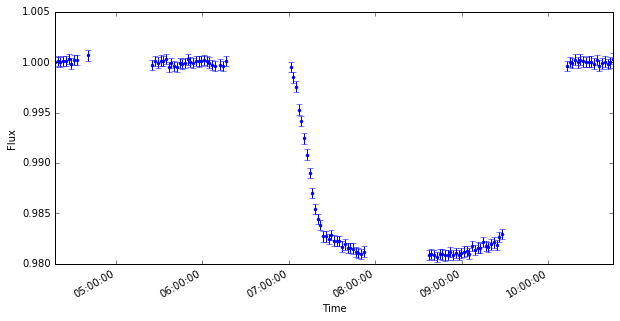

In [58]:
# Import data
data_set = np.loadtxt('data/XO1_wl_transit_FLUX.txt')
data_set[0]

# Seperate out the different columns (: means include all rows)
Julian_Date = data_set[:,0]
Flux = data_set[:,1]
Flux_Error = data_set[:,2]
Raw_Flux = data_set[:,3]
Raw_Flux_Error = data_set[:,4]

# Create the dictionary for pandas - need data and index 
dictionary = {'Flux':data_set[:,1], 'Flux_Error':data_set[:,2], 'Raw_Flux':data_set[:,3],
     'Raw_Flux_Error':data_set[:,4]}
df = pd.DataFrame(data=dictionary, index=data_set[:,4])


# Convert Julian Day Time to UTC using datetime
t = Time(data_set[:,0], format='jd')
UTC = t.datetime
# Change the data function index to UTC
df.index = UTC


# Plot Flux against time
fig, ax = plt.subplots(1, figsize=(10,5))

df['Flux'].plot(kind='line', ax=ax, fmt='.', yerr=df['Flux_Error'])
fig.autofmt_xdate()
ax.set_xlabel('Time')
ax.set_ylabel('Flux')

plt.show()